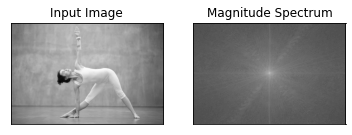

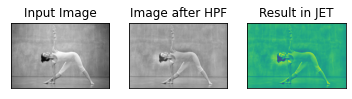

In [15]:
##### cv.dft(), cv.idft()
#边缘和噪声是图像中的高频内容。如果幅度没有太大变化，则它是低频分量。
import numpy as np
import cv2 as cv 
from matplotlib import pyplot as plt

#numpy 中的傅里叶变换
img5 = cv.imread('../Images/img5.png',0)
f = np.fft.fft2(img5)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img5, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
#高通滤波
rows, cols = img5.shape
crow,ccol = rows//2 , cols//2  #中点
fshift[crow-4:crow+5, ccol-4:ccol+5] = 0  #遮蔽框
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img5, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()
#图像锐化

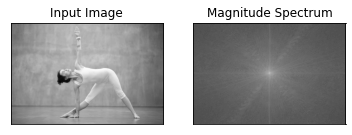

In [16]:
#OpenCV中的傅里叶变换
dft = cv.dft(np.float32(img5),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img5, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


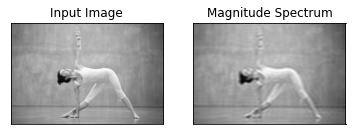

In [17]:
#低通滤波
rows, cols = img5.shape
crow,ccol = rows // 2 , cols // 2
# 首先创建一个掩码，中心正方形为1，其余全为零
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# 应用掩码和逆DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img5, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
#图像模糊

In [ ]:
#性能优化
#可以在找到DFT之前将数组的大小修改为任何最佳大小(通过填充零)。
#对于OpenCV，您必须手动填充零。
#但是对于Numpy，您指定FFT计算的新大小，它将自动为您填充零。
#OpenCV为此提供了一个函数，cv.getOptimalDFTSize()。
#它同时适用于cv.dft()和np.fft.fft2()。

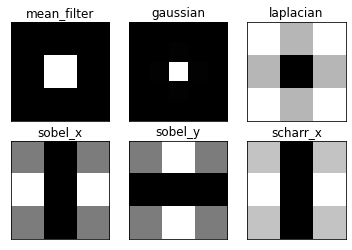

In [19]:
#为什么拉普拉斯算子是高通滤波器
# 没有缩放参数的简单均值滤波器
mean_filter = np.ones((3,3))
# 创建高斯滤波器
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
# 不同的边缘检测滤波器
# x方向上的scharr
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# x方向上的sobel
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# y方向上的sobel
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# 拉普拉斯变换
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()